# Just a quick histogram using matplotlib.pyplot.bar

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

The analysis will be conducted on the data from the csv file regarding smokers which is part of a much larger data conglomerate provided by the White House and a coalition of leading research groups have prepared the *COVID-19 Open Research Dataset* (CORD-19). CORD-19 is a resource of over 134,000 scholarly articles, including over 60,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community and can be found at https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge. 

In [56]:
# loading the data, transforming it into a dataframe and giving it a quick look
data = '/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/unsorted_tables/risk_factors/Smoking Status.csv'

df = pd.read_csv(data)
df.head()

,Unnamed: 0,Date,Study,Study link,Journal,Severe,Severe lower bound,Severe upper bound,Severe p-value,Severe Significant,...,Fatality Significant,Fatality Adjusted,Fatality Calculated,Multivariate adjustment,Study type,Sample Size,Study population,Added on,Critical only,Discharged vs. death?
0,0,2020-05-07,Coronavirus disease 2019 (COVID-19) and cardio...,https://doi.org/10.1016/j.pcad.2020.05.001,Progress in Cardiovascular Disease,OR 2.75,0.46,16.33,NaN,Not Significant,...,NaN,NaN,NaN,NaN,Systematic review and meta-analysis,7 studies,"MEDLINE, Embase, Cochrane Database of Systemat...",NaN,Y,N
1,1,2020-05-06,Active smoking is associated with severity of ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Tobacco Induced Diseases,OR 2.2,1.31,3.67,<0.05,Significant,...,NaN,NaN,NaN,NaN,Systematic review and meta-analysis,5 studies 1247,PubMed and Web of Science up to 9 March 2020,5/20/2020,Y,N
2,2,2020-05-01,"Lung disease severity, Coronary Artery Calcium...",http://doi.org/10.1101/2020.05.01.20087124,medrxiv,NaN,NaN,NaN,NaN,NaN,...,Not Significant,Not Adjusted,Extracted,NaN,Retrospective observational study,279,"Parma 12 University Hospital, Parma, Italy fro...",NaN,N,Y
3,3,2020-05-06,30-day mortality in patients hospitalized with...,https://doi.org/10.1101/2020.05.02.20088336,MedRxiv,NaN,NaN,NaN,NaN,NaN,...,Not Significant,Not Adjusted,Calculated,NaN,Prospective observational study,233,"Luigi Sacco Hospital in Milan, Italy, between ...",NaN,N,N
4,4,2020-05-05,Risk Factors of the Severity of COVID-19: A Me...,https://doi.org/10.1101/2020.04.30.20086744,MedRxiv,RR=1.71,1.25,2.35,NaN,Significant,...,NaN,NaN,NaN,NaN,Systematic review and meta-analysis,"10 Studies, 2272 Patients","PubMed, Google Scholar, EMBASE, and Cochrane L...",NaN,N,N


In [57]:
# We need these 'N' and 'Y''s to be 0 and 1's 
dummy_df = df.replace(to_replace = 'N', value=0)
updated_df = dummy_df.replace(to_replace = 'Y', value=1)
updated_df.head()

,Unnamed: 0,Date,Study,Study link,Journal,Severe,Severe lower bound,Severe upper bound,Severe p-value,Severe Significant,...,Fatality Significant,Fatality Adjusted,Fatality Calculated,Multivariate adjustment,Study type,Sample Size,Study population,Added on,Critical only,Discharged vs. death?
0,0,2020-05-07,Coronavirus disease 2019 (COVID-19) and cardio...,https://doi.org/10.1016/j.pcad.2020.05.001,Progress in Cardiovascular Disease,OR 2.75,0.46,16.33,NaN,Not Significant,...,NaN,NaN,NaN,NaN,Systematic review and meta-analysis,7 studies,"MEDLINE, Embase, Cochrane Database of Systemat...",NaN,1,0
1,1,2020-05-06,Active smoking is associated with severity of ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Tobacco Induced Diseases,OR 2.2,1.31,3.67,<0.05,Significant,...,NaN,NaN,NaN,NaN,Systematic review and meta-analysis,5 studies 1247,PubMed and Web of Science up to 9 March 2020,5/20/2020,1,0
2,2,2020-05-01,"Lung disease severity, Coronary Artery Calcium...",http://doi.org/10.1101/2020.05.01.20087124,medrxiv,NaN,NaN,NaN,NaN,NaN,...,Not Significant,Not Adjusted,Extracted,NaN,Retrospective observational study,279,"Parma 12 University Hospital, Parma, Italy fro...",NaN,0,1
3,3,2020-05-06,30-day mortality in patients hospitalized with...,https://doi.org/10.1101/2020.05.02.20088336,MedRxiv,NaN,NaN,NaN,NaN,NaN,...,Not Significant,Not Adjusted,Calculated,NaN,Prospective observational study,233,"Luigi Sacco Hospital in Milan, Italy, between ...",NaN,0,0
4,4,2020-05-05,Risk Factors of the Severity of COVID-19: A Me...,https://doi.org/10.1101/2020.04.30.20086744,MedRxiv,RR=1.71,1.25,2.35,NaN,Significant,...,NaN,NaN,NaN,NaN,Systematic review and meta-analysis,"10 Studies, 2272 Patients","PubMed, Google Scholar, EMBASE, and Cochrane L...",NaN,0,0


# Let's check which journal yielded most of the studies using vanilla python

In [ ]:
# Using the pandas values.tolist() we transform the columnn 'Journals' into a python list
journals = updated_df['Journal'].values.tolist()

In [60]:
len(journals)

37

In [61]:
# To count the different journals we iterate through them and count each occurence
counts = {}
for x in journals:
    if x in counts:
        counts[x] += 1
    else:
        counts[x] = 1
print(counts)

{'Progress in Cardiovascular Disease': 1, 'Tobacco Induced Diseases': 3, 'medrxiv': 2, 'MedRxiv': 2, 'Journal of Infection': 2, 'no data provided': 1, 'medRxiv': 16, 'Clinical Infectious Diseases': 1, 'Morbidity and Mortality Weekly Report': 1, 'International Journal of Infectious Diseases': 1, 'Critical Care': 1, 'European Journal of Internal Medicine': 1, 'Lancet': 2, 'New England Journal of Medicine': 3}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

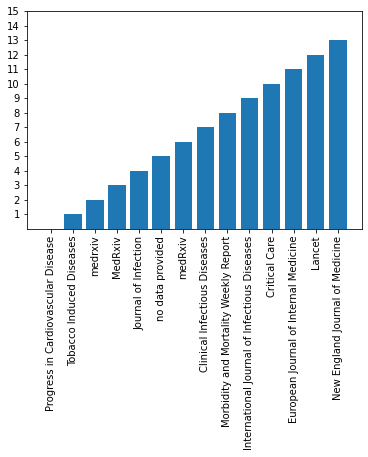

In [55]:
# A histogram can be visualized using matplotlib. Notice the forth line where the labels are rotated
# in the x-axis by 90 degrees so that these do not overlap and how the histogram is order in ascending order.
y_pos = np.arange(len(counts.keys()))
plt.bar(counts.keys(), y_pos)
plt.yticks(np.arange(min(counts.values()), max(counts.values()), 1))
plt.xticks(rotation=90)
